In [2]:
import scipy.io #to .mat file........
import seaborn as sns
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt

In [3]:
pwd

'C:\\Users\\Sony'

In [5]:
for root,dirs, files in os.walk('C:\Projects',topdown=False):
    for file_name in files:
        path = os.path.join(root,file_name)
        print(path)

C:\Projects\0hp_all_fault\14_BA.mat
C:\Projects\0hp_all_fault\14_IR.mat
C:\Projects\0hp_all_fault\14_OR1.mat
C:\Projects\0hp_all_fault\21_BA.mat
C:\Projects\0hp_all_fault\21_IR.mat
C:\Projects\0hp_all_fault\21_OR1.mat
C:\Projects\0hp_all_fault\21_OR2.mat
C:\Projects\0hp_all_fault\21_OR3.mat
C:\Projects\0hp_all_fault\7_BA.mat
C:\Projects\0hp_all_fault\7_IR.mat
C:\Projects\0hp_all_fault\7_OR1.mat
C:\Projects\0hp_all_fault\7_OR2.mat
C:\Projects\0hp_all_fault\7_OR3.mat
C:\Projects\0hp_all_fault\N.mat


In [7]:
path = r'C:\Projects\0hp_all_fault\21_OR3.mat'
mat = scipy.io.loadmat(path)

In [8]:
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Mon Jan 31 09:34:34 2000',
 '__version__': '1.0',
 '__globals__': [],
 'X262_DE_time': array([[ 0.05174933],
        [ 0.05592267],
        [ 0.06844267],
        ...,
        [ 0.07178133],
        [ 0.01335467],
        [-0.04089867]]),
 'X262_FE_time': array([[ 0.04766545],
        [ 0.04704909],
        [ 0.07355273],
        ...,
        [ 0.07807273],
        [ 0.00821818],
        [-0.04273455]]),
 'X262RPM': array([[1796]], dtype=uint16)}

In [9]:
type(mat)

dict

In [10]:
mat.items()

dict_items([('__header__', b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Mon Jan 31 09:34:34 2000'), ('__version__', '1.0'), ('__globals__', []), ('X262_DE_time', array([[ 0.05174933],
       [ 0.05592267],
       [ 0.06844267],
       ...,
       [ 0.07178133],
       [ 0.01335467],
       [-0.04089867]])), ('X262_FE_time', array([[ 0.04766545],
       [ 0.04704909],
       [ 0.07355273],
       ...,
       [ 0.07807273],
       [ 0.00821818],
       [-0.04273455]])), ('X262RPM', array([[1796]], dtype=uint16))])

In [11]:
list(mat.keys())

['__header__',
 '__version__',
 '__globals__',
 'X262_DE_time',
 'X262_FE_time',
 'X262RPM']

In [12]:
key_name=list(mat.keys())[3]
key_name

'X262_DE_time'

In [13]:
DE_data=mat.get(key_name)

In [14]:
len(DE_data)

130549

In [15]:
DE_data.shape

(130549, 1)

In [16]:
DE_fault=mat.get(key_name)

In [17]:
fault= np.full((len(DE_fault),1),file_name[:-4])

In [18]:
fault.shape

(130549, 1)

In [19]:
np.ravel(fault).shape

(130549,)

In [20]:
df_temp = pd.DataFrame({'DE_data':np.ravel(DE_data),'fault':np.ravel(fault)})

In [21]:
df_temp

,DE_data,fault
0,0.051749,N
1,0.055923,N
2,0.068443,N
3,0.096821,N
4,0.130208,N
...,...,...
130544,0.200320,N
130545,0.137720,N
130546,0.071781,N
130547,0.013355,N


<function matplotlib.pyplot.show(close=None, block=None)>

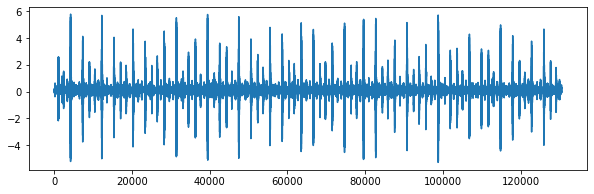

In [22]:
plt.figure(figsize=(10,3))
plt.plot(df_temp.iloc[:,0])
plt.show

In [28]:
df =pd.DataFrame(columns=['DE_data','fault'])

for root,dirs, files in os.walk('C:\Projects',topdown=False):
    for file_name in files:
        path = os.path.join(root,file_name)
        print(path)
        
        mat =scipy.io.loadmat(path)
        
        key_name=list(mat.keys())[3]
        DE_data = mat.get(key_name)
        fault = np.full((len(DE_data),1),file_name[:-4])
        df_temp=pd.DataFrame({'DE_data':np.ravel(DE_data),'fault':np.ravel(fault)})
        df = pd.concat([df,df_temp],axis=0)
        print(df['fault'].unique())
        
df.to_csv('0hpall_fault.csv',index=False)

C:\Projects\0hp_all_fault\14_BA.mat
['14_BA']
C:\Projects\0hp_all_fault\14_IR.mat
['14_BA' '14_IR']
C:\Projects\0hp_all_fault\14_OR1.mat
['14_BA' '14_IR' '14_OR1']
C:\Projects\0hp_all_fault\21_BA.mat
['14_BA' '14_IR' '14_OR1' '21_BA']
C:\Projects\0hp_all_fault\21_IR.mat
['14_BA' '14_IR' '14_OR1' '21_BA' '21_IR']
C:\Projects\0hp_all_fault\21_OR1.mat
['14_BA' '14_IR' '14_OR1' '21_BA' '21_IR' '21_OR1']
C:\Projects\0hp_all_fault\21_OR2.mat
['14_BA' '14_IR' '14_OR1' '21_BA' '21_IR' '21_OR1' '21_OR2']
C:\Projects\0hp_all_fault\21_OR3.mat
['14_BA' '14_IR' '14_OR1' '21_BA' '21_IR' '21_OR1' '21_OR2' '21_OR3']
C:\Projects\0hp_all_fault\7_BA.mat
['14_BA' '14_IR' '14_OR1' '21_BA' '21_IR' '21_OR1' '21_OR2' '21_OR3'
 '7_BA']
C:\Projects\0hp_all_fault\7_IR.mat
['14_BA' '14_IR' '14_OR1' '21_BA' '21_IR' '21_OR1' '21_OR2' '21_OR3'
 '7_BA' '7_IR']
C:\Projects\0hp_all_fault\7_OR1.mat
['14_BA' '14_IR' '14_OR1' '21_BA' '21_IR' '21_OR1' '21_OR2' '21_OR3'
 '7_BA' '7_IR' '7_OR1']
C:\Projects\0hp_all_fault\7_OR

In [29]:
df

,DE_data,fault
0,0.039846,14_BA
1,0.089705,14_BA
2,0.136643,14_BA
3,0.177532,14_BA
4,0.205903,14_BA
...,...,...
243933,-0.059664,N
243934,-0.063836,N
243935,-0.03463,N
243936,0.016689,N


In [30]:
df['fault'].unique()

array(['14_BA', '14_IR', '14_OR1', '21_BA', '21_IR', '21_OR1', '21_OR2',
       '21_OR3', '7_BA', '7_IR', '7_OR1', '7_OR2', '7_OR3', 'N'],
      dtype=object)

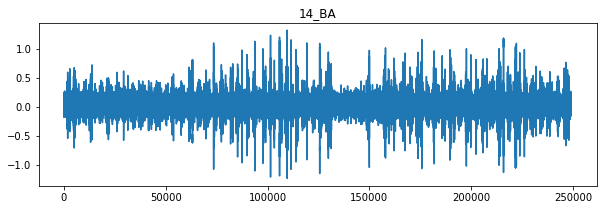

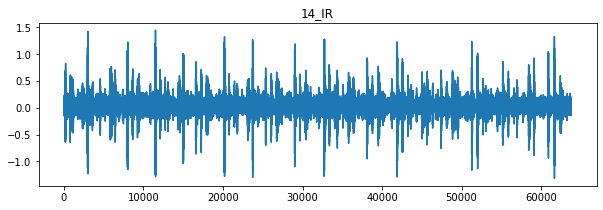

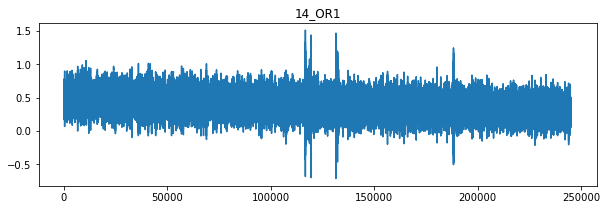

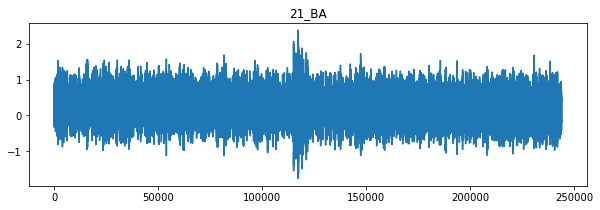

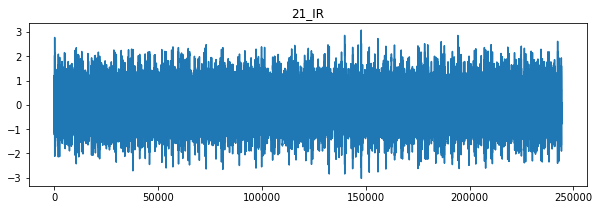

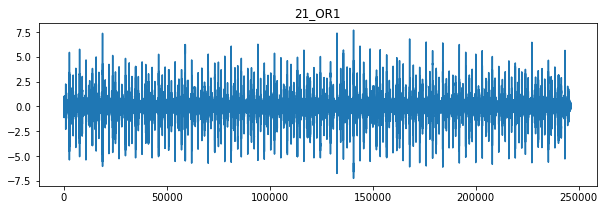

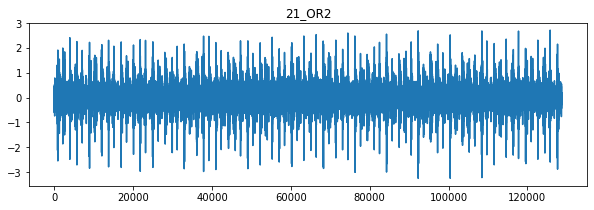

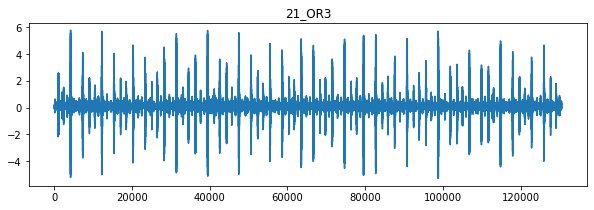

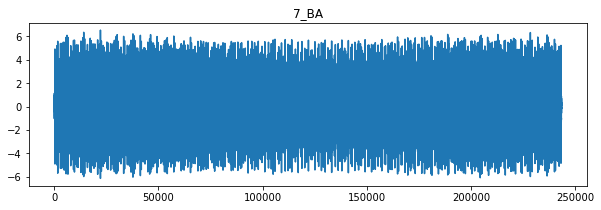

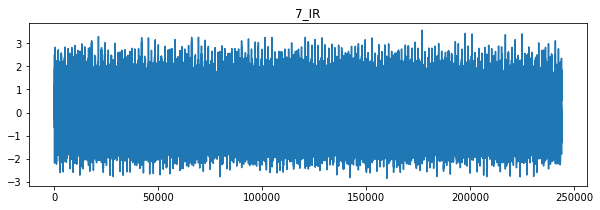

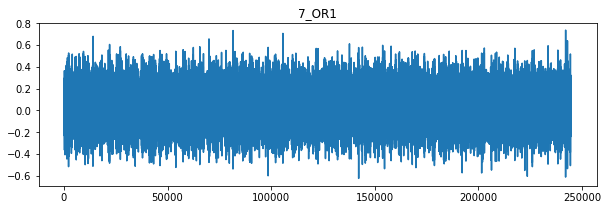

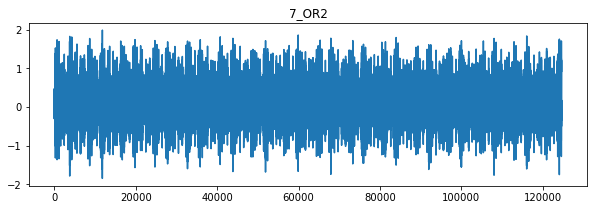

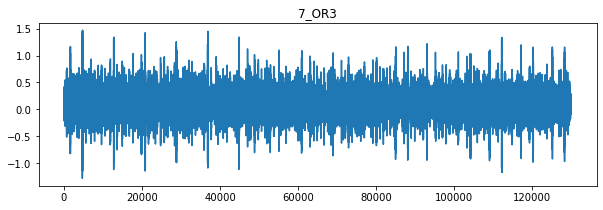

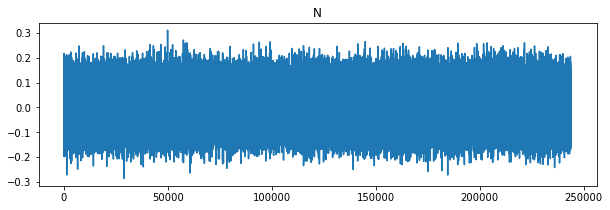

In [31]:
faults = df['fault'].unique()
for f in faults:
        plt.figure(figsize=(10,3))
        plt.plot(df[df['fault']==f].iloc[:,0])
        plt.title(f)
        plt.show()

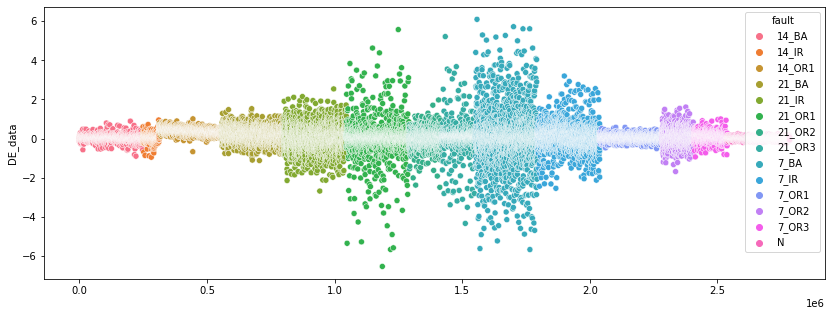

In [32]:
plt.figure(figsize=(14,5))
sns.scatterplot(data=df.iloc[::100,:],y='DE_data',x=np.arange(0,len(df),100),hue='fault')
plt.show()